# Analysing Premier League seasons

In [1]:
# Importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
All_season = pd.read_csv("Season_tables/All_season")

### Lets find the answers for these questions from the data.
1. Trend over time.
   - How have total points changed over the years?
   - Have goals per season increased or decreased.
   - Which teams have been the most consistent? (Top 4 finishes, relegation battles).
   - Has the league got competitive over time or not.
2. Performance analysis
   - Which teams have the best points per match over different eras?
   - Are there patterns in how promoted teams perform in their first season?
   - Which teams rely the most on their top scorer for goals?
3. Correlation Analysis.
   - Do teams with higher average attendance perform better?
   - Is there a strong relationship between goal difference and final leagure position?
   - How important is having a top scorer with 20+ goals for league success?
4. Relegation & Promotion trends.
   - How often do newly promoted teams get relegated?
   - What is the average points tally needed to avoid releagation.
   - Which teams have bounced back quickly after relegation.
5. Forming some actionable thumb rules based on the trends (previous seasons) for avoiding relegation, qualify for top 5 positions & win the league.
6. How to form a team based on the thumb rules.

- Seasons Analysis 
- Attendance trends of season 
- Points trends of Champion teams
- Points, Goal difference various traits of relegated teams.
- Performance of teams promoted but not relegated.
- Points to Rank trends to see competition among teams

In [3]:
All_season

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,Attendance,Top Team Scorer,Goalkeeper,Notes,Season,Goals scored by top team scorer,years_in_PL_after_promotion,Promoted
0,1,Manchester Utd,42,24,12,6,67,31,36,84,2.00,35132,Mark Hughes,Peter Schmeichel,→ Champions League via league finish,1992-1993,15,1,NaN
1,2,Aston Villa,42,21,11,10,57,40,17,74,1.76,29594,Dean Saunders,Nigel Spink,→ UEFA Cup via league finish,1992-1993,12,1,NaN
2,3,Norwich City,42,21,9,12,61,65,-4,72,1.71,16253,Mark Robins,Bryan Gunn,→ UEFA Cup via league finish 1,1992-1993,15,1,NaN
3,4,Blackburn,42,20,11,11,68,46,22,71,1.69,16247,Alan Shearer,Bobby Mimms,NaN,1992-1993,16,1,NaN
4,5,QPR,42,17,12,13,63,55,8,63,1.50,15001,Les Ferdinand,Tony Roberts,NaN,1992-1993,20,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,16,Everton,38,11,6,21,43,66,-23,39,1.03,38446,Richarlison,Jordan Pickford,NaN,2021-2022,10,30,No
602,17,Leeds United,38,9,11,18,42,79,-37,38,1.00,36308,Raphinha,Illan Meslier,NaN,2021-2022,11,2,No
603,18,Burnley,38,7,14,17,34,53,-19,35,0.92,19278,Maxwel Cornet,Nick Pope,Relegated,2021-2022,9,6,No
604,19,Watford,38,6,5,27,34,77,-43,23,0.61,20614,Emmanuel Dennis,Ben Foster,Relegated,2021-2022,10,1,Yes


#### Which teams have won the Premier League the most?

In [4]:
All_season[All_season['Rk']== 1]['Squad'].value_counts()

Squad
Manchester Utd     13
Manchester City     6
Chelsea             5
Arsenal             3
Blackburn           1
Leicester City      1
Liverpool           1
Name: count, dtype: int64

--------------
Manchester has been the epicenter of Premier League dominance, with two clubs significantly outperforming the rest. Manchester United leads the pack with an impressive 13 titles, followed by Manchester City with 6. Outside of Manchester, London's Chelsea has secured 5 championships, while Arsenal has claimed 3. Notably, Blackburn Rovers, Leicester City, and Liverpool each hold a single Premier League title.


##  Seasons Analysis

#### Counts of Teams taking part

In [12]:
All_season.groupby(by="Season")['Squad'].count()

Season
1992-1993    22
1993-1994    22
1994-1995    22
1995-1996    20
1996-1997    20
1997-1998    20
1998-1999    20
1999-2000    20
2000-2001    20
2001-2002    20
2002-2003    20
2003-2004    20
2004-2005    20
2005-2006    20
2006-2007    20
2007-2008    20
2008-2009    20
2009-2010    20
2010-2011    20
2011-2012    20
2012-2013    20
2013-2014    20
2014-2015    20
2015-2016    20
2016-2017    20
2017-2018    20
2018-2019    20
2019-2020    20
2020-2021    20
2021-2022    20
Name: Squad, dtype: int64

-----

"The Premier League's structure shifted from 22 teams in its initial three seasons (1992-1995) to a consistent 20 teams from 1996 onward, a move intended to enhance quality, lessen player fatigue, and boost financial outcomes."





In [8]:
All_season['Squad'].value_counts()

Squad
Manchester Utd     30
Liverpool          30
Tottenham          30
Arsenal            30
Chelsea            30
Everton            30
Aston Villa        27
Newcastle Utd      27
West Ham           26
Manchester City    25
Southampton        23
Blackburn          18
Sunderland         16
Leicester City     16
Middlesbrough      15
Fulham             15
Leeds United       14
Crystal Palace     13
West Brom          13
Bolton             13
Norwich City       10
Stoke City         10
Coventry City       9
Burnley             8
Wigan Athletic      8
Wolves              8
Charlton Ath        8
Watford             8
Sheffield Weds      8
Wimbledon           8
Derby County        7
QPR                 7
Birmingham City     7
Portsmouth          7
Swansea City        7
Hull City           5
Brighton            5
Ipswich Town        5
Bournemouth         5
Nott'ham Forest     5
Sheffield Utd       5
Reading             3
Oldham Athletic     2
Cardiff City        2
Bradford City       2
Hudd

#### Among 50 teams Manchester United, Liverpool, Tottenham, Arsenal, Chelsea & Everton have been part of all 30 seasons 

In [16]:
All_season.columns

Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'Attendance', 'Top Team Scorer', 'Goalkeeper', 'Notes', 'Season',
       'Goals scored by top team scorer', 'years_in_PL_after_promotion',
       'Promoted'],
      dtype='object')

### Goals scored by teams per seasons

In [9]:
tab = pd.DataFrame(All_season.groupby(by="Season")['GF'].sum().round(1)).reset_index()

In [34]:
tab[tab['GF'] < 1100]['GF'].mean()

1013.925925925926

In [35]:
tab.GF.mean()

1032.9666666666667

In [47]:
tab.tail().GF.mean()

1043.8

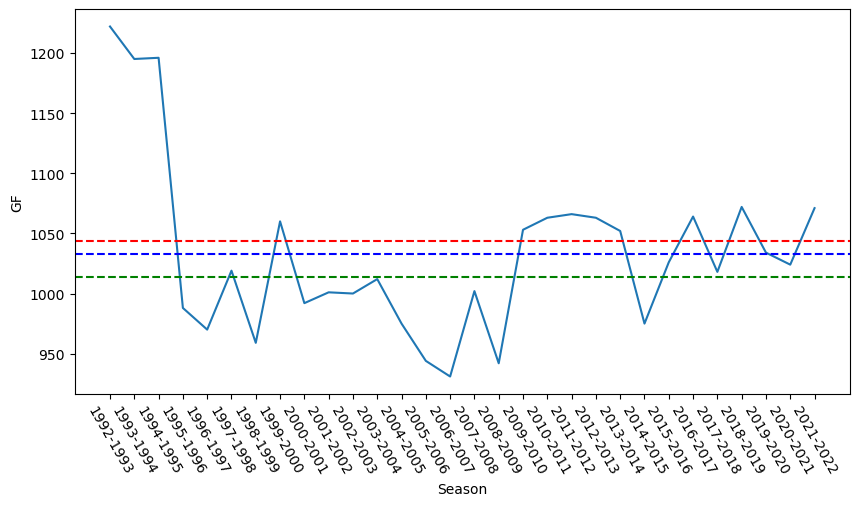

In [84]:
plt.figure(figsize=(10,5))
sns.lineplot(data=tab,x='Season',y='GF')
plt.axhline(y = 1013.925925925926, color = 'g', linestyle = '--',label = "Average Goals excluding first 3 seasons (Green line)") 
plt.axhline(y = 1043.8, color = 'r', linestyle = '--',label = "Last 5 seasons Average (red line)") 
plt.axhline(y = 1032.9666666666667, color = 'b', linestyle = '--',label = "Average Goals includeing first 3 seasons (Blue line)")
# plt.legend(bbocx_to_anchor = (.78, 1), loc = 'upper center')
x,y =plt.xticks(rotation=300)

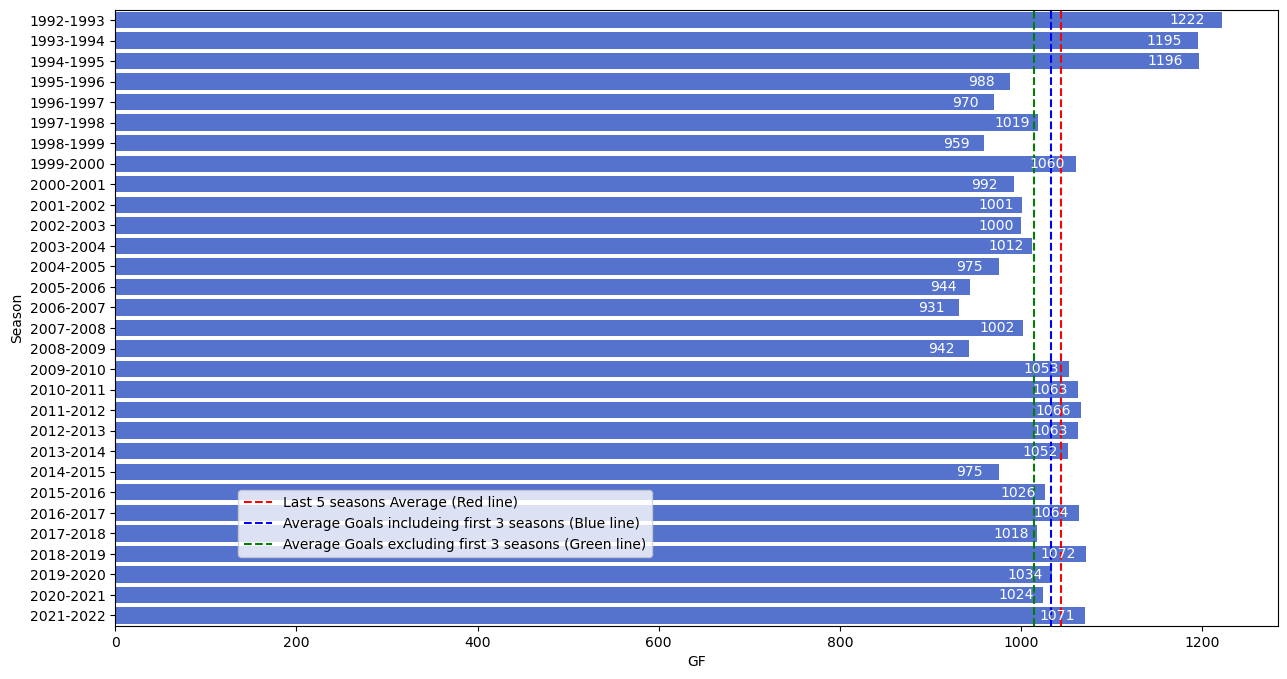

In [70]:
plt.figure(figsize=(15,8))
dia = sns.barplot(data=tab,x="GF",y='Season',color='royalblue')
plt.axvline(x = 1043.8, color = 'r', linestyle = '--',label = "Last 5 seasons Average (Red line)") 
plt.axvline(x = 1032.9666666666667, color = 'b', linestyle = '--',label = "Average Goals includeing first 3 seasons (Blue line)")
plt.axvline(x = 1013.925925925926, color = 'g', linestyle = '--',label = "Average Goals excluding first 3 seasons (Green line)") 
plt.legend(bbox_to_anchor = (.1,.1), loc = 'lower left')
next_ = 0
for i in tab['GF']:
    dia.text(x=i/1.05,y=.2 + next_,s=str(i),color="white",fontsize=10)
    next_ = next_ + 1

#### 2006-2007 season saw least number of goals scored (931) and First season 1996-1997 season had most 1222 goals this is beause first three season of PL had 22 teams. In 20 teams PL season 2021-2022 season had most 1071 goals.   

## Attendance trends

In [37]:
Attendance_trends = pd.DataFrame(All_season.groupby(by="Season")['Attendance'].mean().round(1)).reset_index()

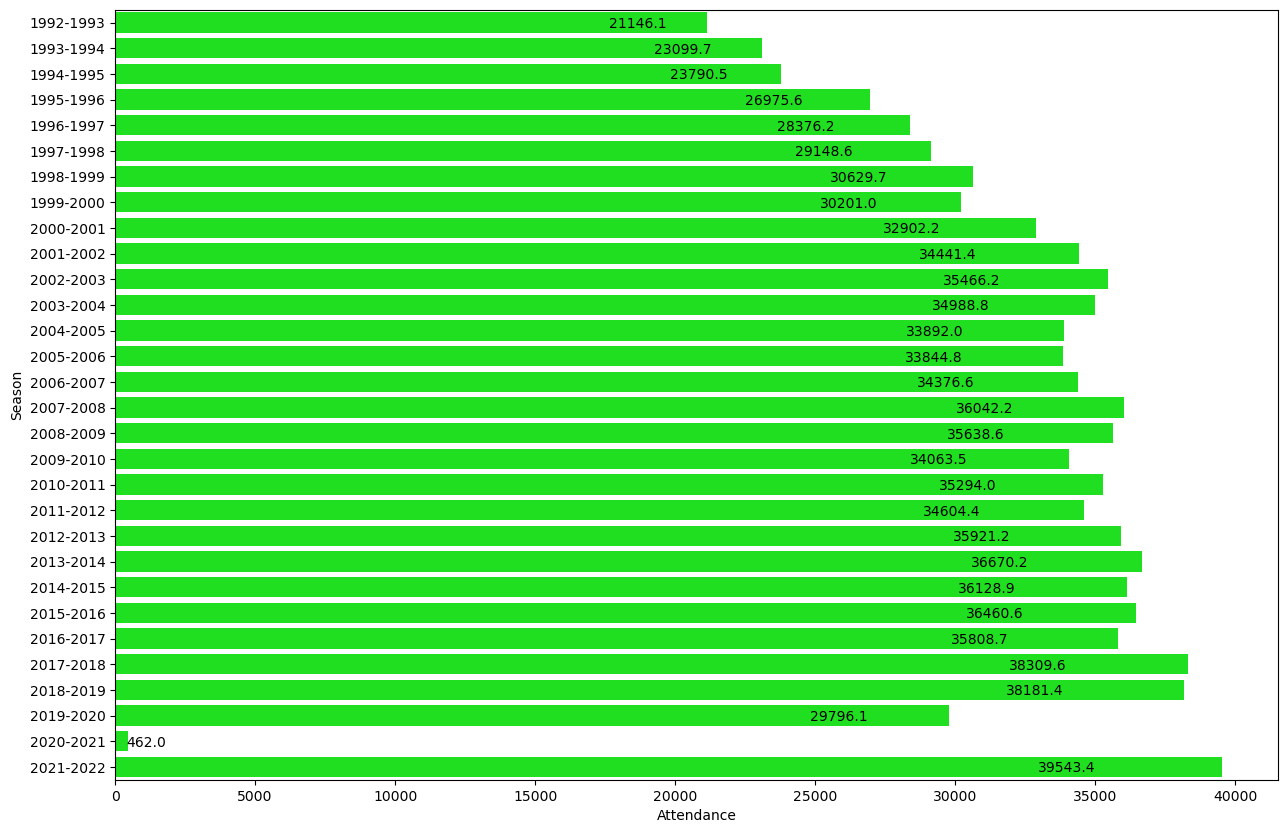

In [38]:
plt.figure(figsize=(15,10))
dia = sns.barplot(data=Attendance_trends,x="Attendance",y='Season',color='lime')
next_ = 0
for i in Attendance_trends['Attendance']:
    dia.text(x=i/1.2,y=.2 + next_,s=str(i),color="black",fontsize=10)
    next_ = next_ + 1

#### Over all trends of Attendance is going up from the start of PL. 
- In first 11 season of PL Average attendance grown form 21146 to 35466 which is 67% increase in Attendance.
This may be because of teams have huge stadiums promoted to PL or teams in PL increased the capacity of stadium.
- We see significant drop in attendance between 2019 - 2021, this is due to corona virus infaction that led to closed door matches. 
- 2021- 2022 season have all time highest Average Attendance

## Know the Champions

In [39]:
rank_1 =  All_season.loc[All_season['Rk'] == 1]

In [40]:
rank_1['Squad'].value_counts()

Squad
Manchester Utd     13
Manchester City     6
Chelsea             5
Arsenal             3
Blackburn           1
Leicester City      1
Liverpool           1
Name: count, dtype: int64

###### Only 7 Different teams had there hands on the trophy 
###### Manchester United had won premier league trophy for most 13 times

<Axes: ylabel='Density'>

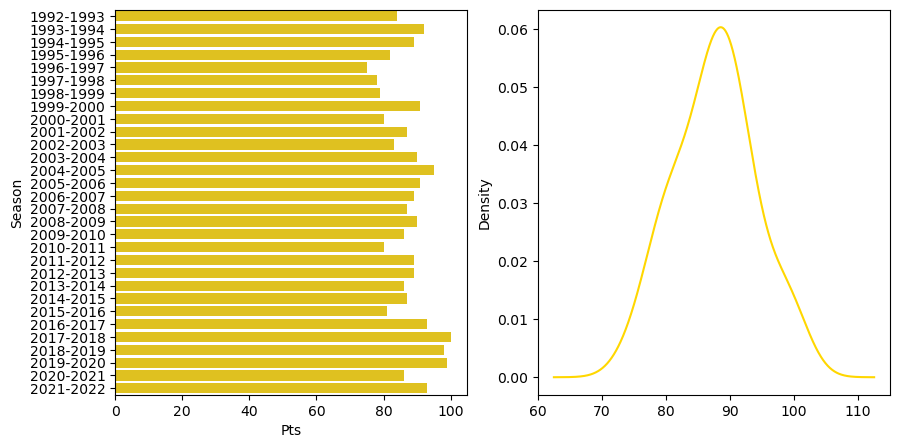

In [41]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(data=rank_1,y="Season",x="Pts",color="gold")

plt.subplot(1,2,2)
rank_1['Pts'].plot(kind="kde",color='gold')

In [42]:
rank_1['Pts'].mean(),rank_1['Pts'].median()

(87.63333333333334, 88.0)

<Axes: ylabel='Density'>

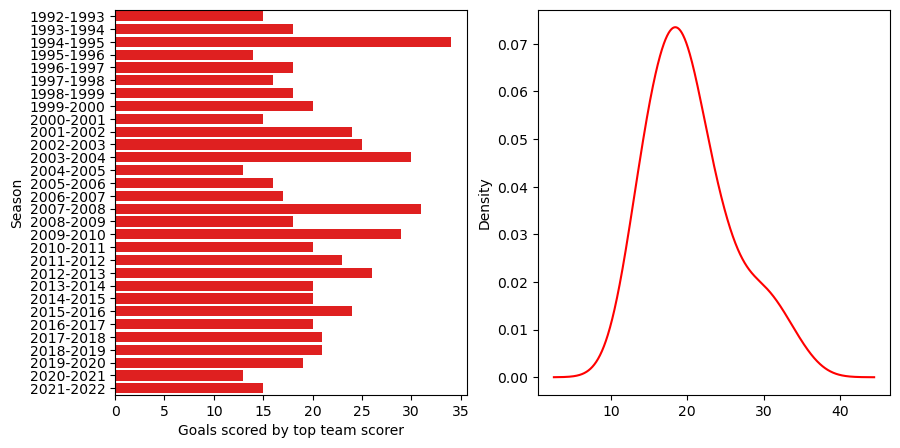

In [43]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(data=rank_1,y='Season',x='Goals scored by top team scorer',color='r')
plt.subplot(1,2,2)
rank_1['Goals scored by top team scorer'].plot(kind="kde",color='r')

In [44]:
rank_1['Goals scored by top team scorer'].mean(),rank_1['Goals scored by top team scorer'].median()

(20.433333333333334, 20.0)

#### From last 3 season top scorer of champion has scored less than average (20) this could because of there must be more than one player heavily contibuting to goals scored by team.

<Axes: ylabel='Density'>

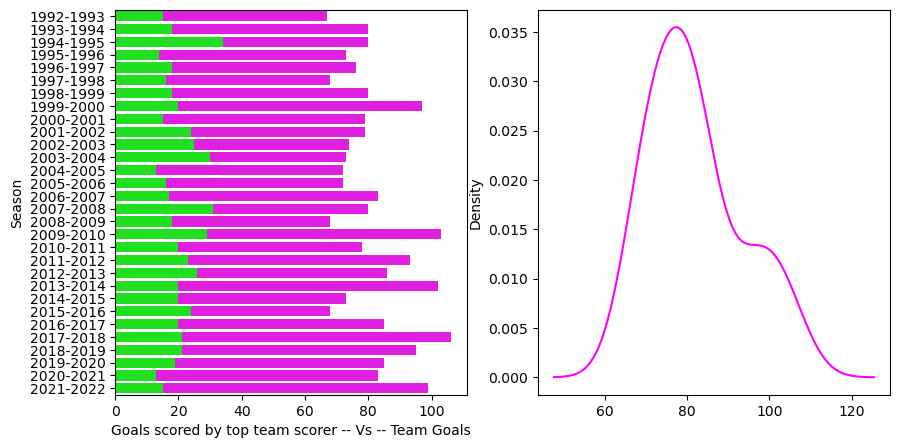

In [45]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(data=rank_1,y='Season',x='GF',color='magenta')
sns.barplot(data=rank_1,y="Season",x="Goals scored by top team scorer",color='lime')
plt.xlabel("Goals scored by top team scorer -- Vs -- Team Goals")
plt.subplot(1,2,2)
rank_1['GF'].plot(kind="kde",color='magenta')

In [46]:
rank_1['GF'].mean(),rank_1['GF'].median()

(81.9, 80.0)

In [47]:
rank_1['GF'].sum(),rank_1['Goals scored by top team scorer'].sum()

(2457, 613)

In [48]:
round((613/2457)*100,2)

24.95

#### With little amount of data we have we got some insight about champions teams 
- To become champion of PL team atleast have to get 87 points.
- Champion need a striker who can score atleast 20 in a season
- Taking all seasons in perspective Top scorer of champion team atleast contribute 25% out of total goals scored by the team.

## Know relegated teams 

In [49]:
relegated_teams = All_season.loc[(All_season['Rk'] > 17) & (All_season['Rk'] <=20)]

<Axes: xlabel='count', ylabel='Squad'>

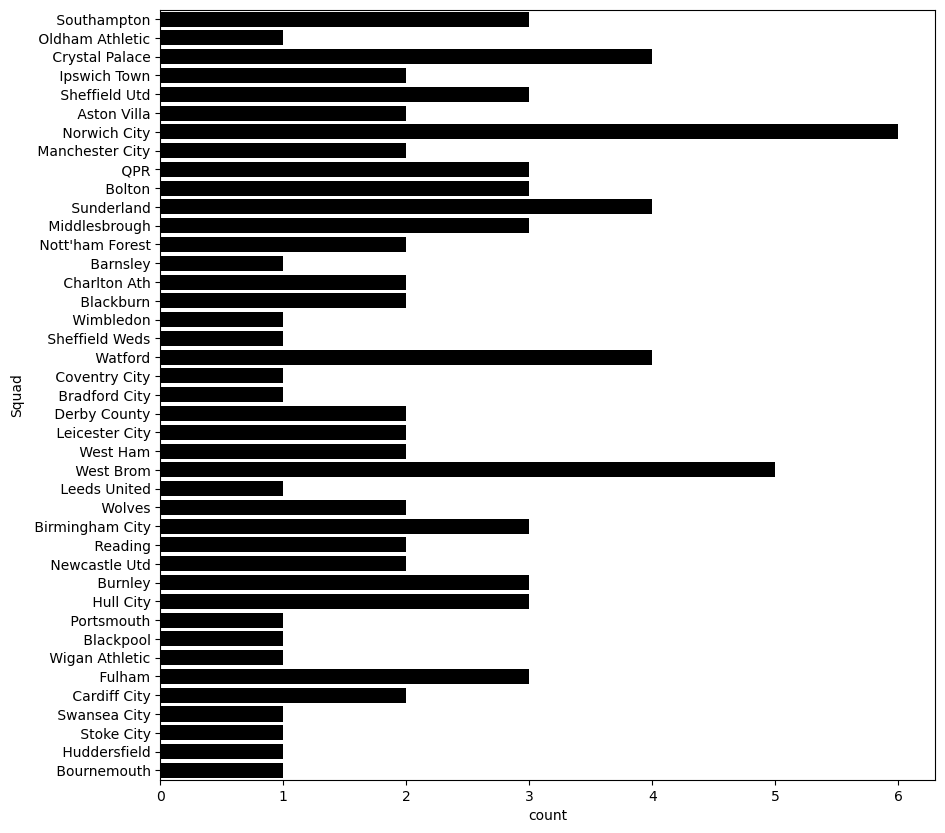

In [50]:
plt.figure(figsize=(10,10))
sns.countplot(data=relegated_teams,y='Squad',color='black')

##### Norwich City and West Brom are teams which relegated atleast 5 time in last 30 seasons

<Axes: ylabel='Density'>

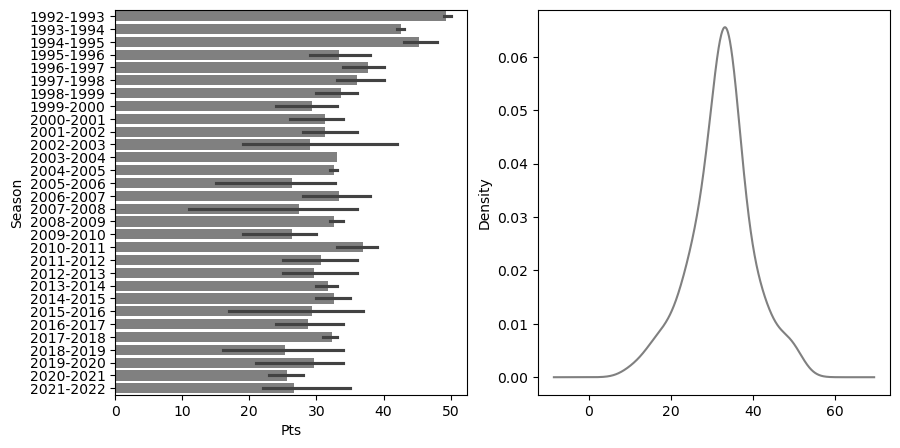

In [51]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(data=relegated_teams,y="Season",x="Pts",color="grey")

plt.subplot(1,2,2)
relegated_teams['Pts'].plot(kind="kde",color='grey')

In [52]:
relegated_teams['Pts'].mean(),relegated_teams['Pts'].median()

(32.333333333333336, 33.0)

<Axes: ylabel='Density'>

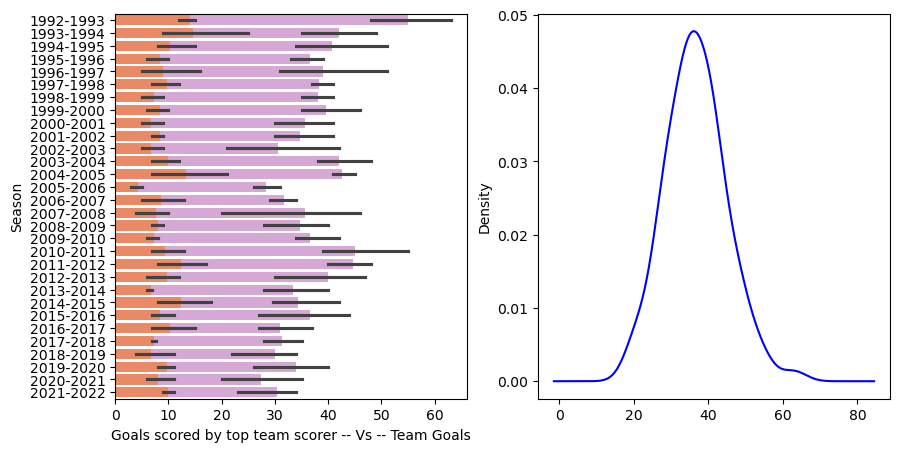

In [53]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(data=relegated_teams,y='Season',x='GF',color='plum')
sns.barplot(data=relegated_teams,y="Season",x="Goals scored by top team scorer",color='coral')
plt.xlabel("Goals scored by top team scorer -- Vs -- Team Goals")
plt.subplot(1,2,2)
relegated_teams['GF'].plot(kind="kde",color='blue')

In [54]:
relegated_teams['Goals scored by top team scorer'].mean(),relegated_teams['Goals scored by top team scorer'].median()

(9.11111111111111, 8.0)

In [55]:
relegated_teams['GF'].sum(),relegated_teams['Goals scored by top team scorer'].sum()

(3300, 820)

In [56]:
round((820/3300)*100,1)

24.8

- Teams should try to get more than 33 points to avoid relegation to lower division leagues
- One thing that we also observed that in last 4 seasons the points gap between winner and relegated teams has increased. Teams are getting few points and getting relegated and on the other hand we see first 3 seasons we see teams with 40 to 50 points also got relegated.

In [57]:
relegated_teams['years_in_PL_after_promotion'].value_counts()

years_in_PL_after_promotion
1     40
2     14
3      5
6      5
4      4
7      4
8      4
10     3
11     3
13     2
5      2
9      1
12     1
16     1
24     1
Name: count, dtype: int64

In last 30 seasons 90 teams relegated out which 40 relegated just after promotion, 14 relegated in there 2nd year in PL and 5 teams relegated in 3rd year of PL promotion. 
- For any promoted teams first 3 year are very risky and have chances of relegation. 

### Teams promoted but not relegated

In [58]:
promoted_teams_not_relegated = All_season.loc[(All_season['Promoted'] == "Yes") & (All_season['Notes'] != "Relegated")]

In [59]:
promoted_teams_not_relegated

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,Attendance,Top Team Scorer,Goalkeeper,Notes,Season,Goals scored by top team scorer,years_in_PL_after_promotion,Promoted
24,3,Newcastle Utd,42,23,8,11,82,41,41,77,1.83,33792,Andy Cole,Pavel Srníček,→ UEFA Cup via league finish,1993-1994,34,1,Yes
34,13,West Ham,42,13,13,16,47,58,-11,52,1.24,20595,Trevor Morley,Luděk Mikloško,NaN,1993-1994,13,1,Yes
46,3,Nott'ham Forest,42,22,11,9,72,43,29,77,1.83,22079,Stan Collymore,Mark Crossley,→ UEFA Cup via league finish,1994-1995,23,1,Yes
77,12,Middlesbrough,38,11,10,17,35,50,-15,43,1.13,29220,Nick Barmby,Gary Walsh,NaN,1995-1996,7,1,Yes
94,9,Leicester City,38,12,11,15,46,54,-8,47,1.24,20183,Steve Claridge,Kasey Keller,→ UEFA Cup via cup win 2,1996-1997,12,1,Yes
97,12,Derby County,38,11,13,14,45,58,-13,46,1.21,17888,Dean Sturridge,Russell Hoult,NaN,1996-1997,11,1,Yes
125,20,Crystal Palace,38,8,9,21,37,71,-34,33,0.87,22266,Neil Shipperley,Kevin Miller,"Relegated, → UEFA Intertoto Cup",1997-1998,7,1,Yes
134,9,Middlesbrough,38,12,15,11,48,54,-6,51,1.34,34389,Hamilton Ricard,Mark Schwarzer,NaN,1998-1999,15,1,Yes
152,7,Sunderland,38,16,10,12,57,56,1,58,1.53,39300,Kevin Phillips,Thomas Sørensen,NaN,1999-2000,30,1,Yes
162,17,Bradford City,38,9,9,20,38,68,-30,36,0.95,18030,Dean Windass,Matt Clarke,→ UEFA Intertoto Cup via league finish,1999-2000,10,1,Yes


<Axes: xlabel='count', ylabel='Squad'>

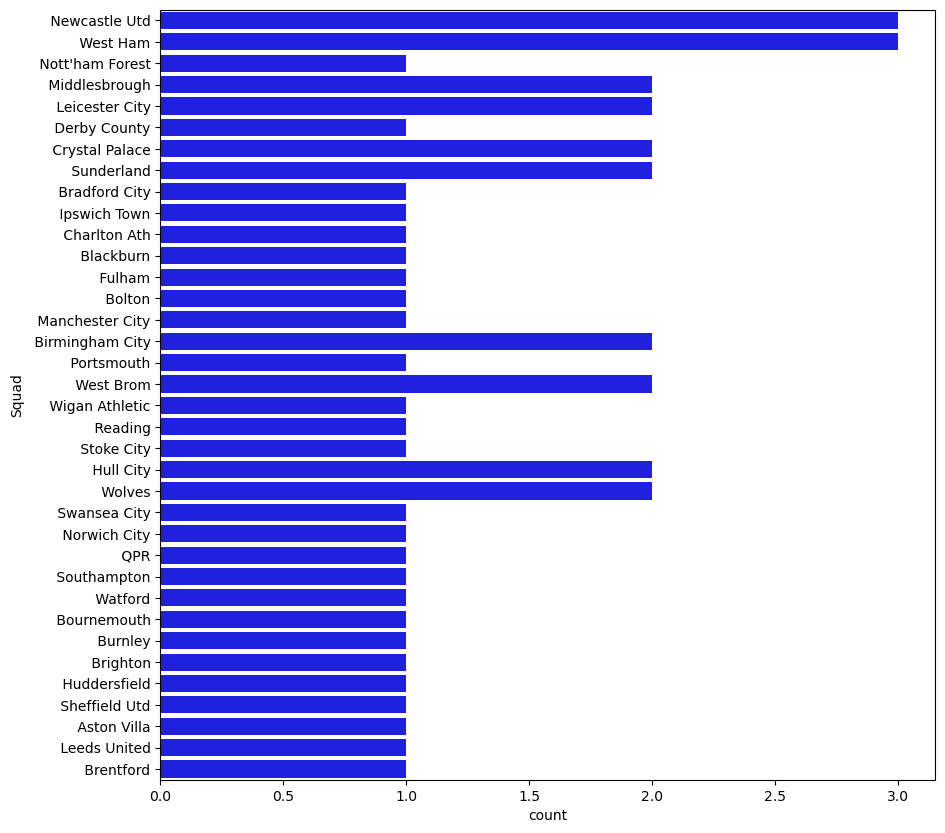

In [60]:
plt.figure(figsize=(10,10))
sns.countplot(data=promoted_teams_not_relegated,y='Squad',color='blue')

<Axes: ylabel='Density'>

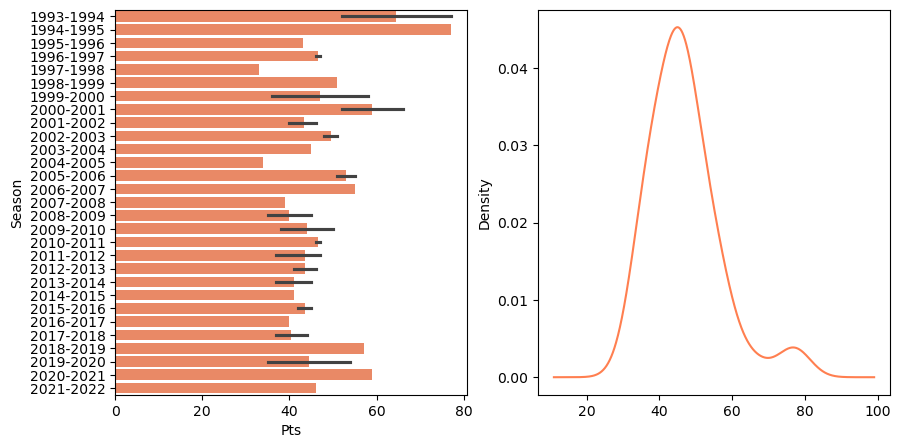

In [61]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(data=promoted_teams_not_relegated,y="Season",x="Pts",color="coral")

plt.subplot(1,2,2)
promoted_teams_not_relegated['Pts'].plot(kind="kde",color='coral')

In [62]:
promoted_teams_not_relegated['Pts'].mean(),promoted_teams_not_relegated['Pts'].median()

(46.8125, 46.0)

<Axes: ylabel='Density'>

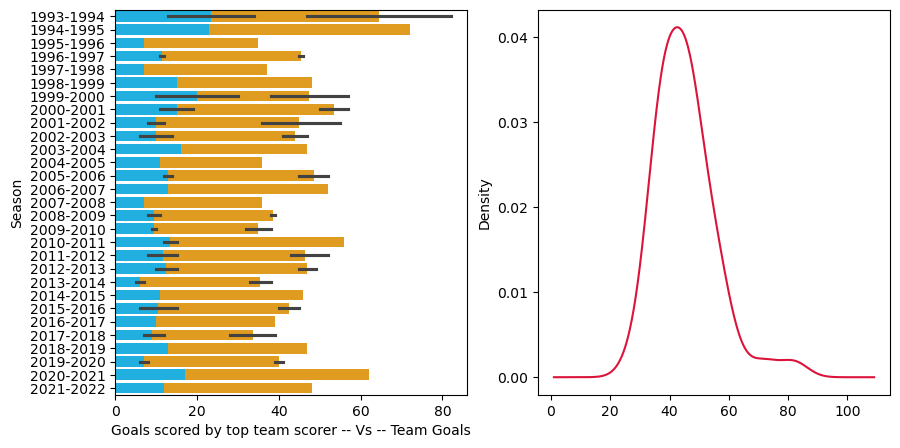

In [63]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(data=promoted_teams_not_relegated,y='Season',x='GF',color='orange')
sns.barplot(data=promoted_teams_not_relegated,y="Season",x="Goals scored by top team scorer",color='deepskyblue')
plt.xlabel("Goals scored by top team scorer -- Vs -- Team Goals")
plt.subplot(1,2,2)
promoted_teams_not_relegated['GF'].plot(kind="kde",color='crimson')

In [64]:
promoted_teams_not_relegated['Goals scored by top team scorer'].mean(),promoted_teams_not_relegated['Goals scored by top team scorer'].median()

(12.020833333333334, 11.0)

In [65]:
promoted_teams_not_relegated['GF'].sum(),promoted_teams_not_relegated['Goals scored by top team scorer'].sum()

(2176, 577)

In [66]:
round((577/2176)*100,1)

26.5

In [67]:
plt.figure(figsize=(9,6))
sns.heatmap(All_season.corr(),annot=True)

ValueError: could not convert string to float: ' Manchester Utd'

<Figure size 900x600 with 0 Axes>

# Competition among teams

Compitition means teams are fighting for each single points, we all like compitition where anybody has power to beat anybody and matches are not predictable. 

If we try to understand compitition in a league we can get a signal from points each team gets and what is the difference of points between teams

For example - We see the points gap between 1st and 2nd finishing teams in season 2004-2005 and 2011-2012, we find the gap between 2004-2005 season is large to season 2011-2012

In 2011-2012 season there is no points difference in 1st and 2nd finishing team and it was a very close fight and in this same season Sergio Aguero scored the last minute goal against QPR in a title deciding match. (Agueroooooooooooooooo)

If we ask anybody they will tell us 2011-2012 season was more interesting than 2004-2005 because the title battle was very close. Same goes for relegation battle and each rank teams fight for  

For better understanding see visual down below.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

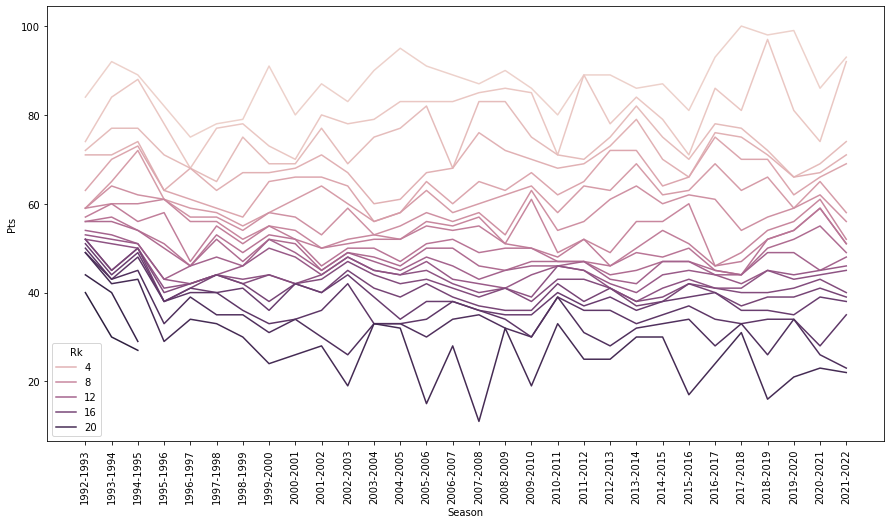

In [65]:
plt.figure(figsize=(15,8))
sns.lineplot(data=All_season,x="Season",y="Pts",hue='Rk')
plt.xticks(rotation=90)

To understand which part of seasons table is more compititive in terms of points gap

In [68]:
top_5_teams = All_season.loc[All_season['Rk'] <= 5]
teams_rank_6_to_10 = All_season.loc[(All_season['Rk'] > 5) & (All_season['Rk'] <=10 )]
teams_rank_11_to_15 = All_season.loc[(All_season['Rk'] > 10) & (All_season['Rk'] <=15 )]
teams_rank_16_to_20 = All_season.loc[(All_season['Rk'] > 15) & (All_season['Rk'] <=20 )]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, '1992-1993'),
  Text(1, 0, '1993-1994'),
  Text(2, 0, '1994-1995'),
  Text(3, 0, '1995-1996'),
  Text(4, 0, '1996-1997'),
  Text(5, 0, '1997-1998'),
  Text(6, 0, '1998-1999'),
  Text(7, 0, '1999-2000'),
  Text(8, 0, '2000-2001'),
  Text(9, 0, '2001-2002'),
  Text(10, 0, '2002-2003'),
  Text(11, 0, '2003-2004'),
  Text(12, 0, '2004-2005'),
  Text(13, 0, '2005-2006'),
  Text(14, 0, '2006-2007'),
  Text(15, 0, '2007-2008'),
  Text(16, 0, '2008-2009'),
  Text(17, 0, '2009-2010'),
  Text(18, 0, '2010-2011'),
  Text(19, 0, '2011-2012'),
  Text(20, 0, '2012-2013'),
  Text(21, 0, '2013-2014'),
  Text(22, 0, '2014-2015'),
  Text(23, 0, '2015-2016'),
  Text(24, 0, '2016-2017'),
  Text(25, 0, '2017-2018'),
  Text(26, 0, '2018-2019'),
  Text(27, 0, '2019-2020'),
  Text(28, 0, '2020-2021'),
  Text(29, 0, '2021-2022')]

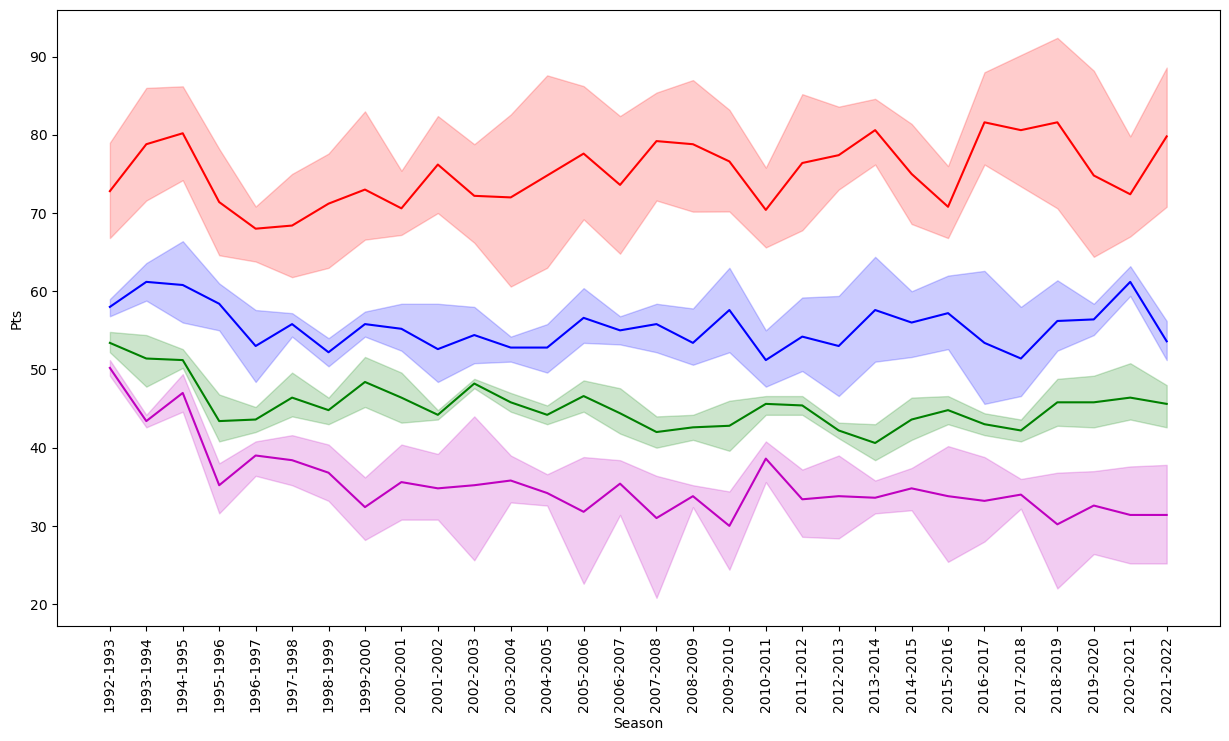

In [69]:
plt.figure(figsize=(15,8))
sns.lineplot(data=top_5_teams,x="Season",y="Pts",color= "r")
sns.lineplot(data=teams_rank_6_to_10,x="Season",y="Pts",color ='blue')
sns.lineplot(data=teams_rank_11_to_15,x="Season",y="Pts",color = "green")
sns.lineplot(data=teams_rank_16_to_20,x="Season",y='Pts',color='m')
plt.xticks(rotation=90)

Red part shows top 5 teams, Blue part shows teams ranking 6 to 10,Green part shows teams ranking 11 to 15 and megenta part show teams raning from 16 to 20

We observed that green part is very thiner, that shows the points difference between teams (11-15) is less as compared to teams in red part 

It is very hard to sustain and maintain a single rank / position in green part of season table because if a teams does not get points after a match other teams will overtake as points difference is very less.

So teams ranking from 11 to 15 are very compititive.